In [1]:
import local_models.local_models
import local_models.loggin
import local_models.TLS_models
import local_models.linear_projections
import local_models.utils
import local_models.visualization
import local_models.algorithms
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
import sklearn.datasets
import sklearn.decomposition
import logging
import ml_battery.log
import time
import os
from IPython.display import Markdown as md

logger = logging.getLogger(__name__)

reload(local_models.local_models)
#reload(lm)
#reload(local_models.loggin)
#reload(local_models.TLS_models)
np.warnings.filterwarnings('ignore')

In [2]:
kernel_names = {
    local_models.local_models.GaussianKernel: 'gaussian',
    local_models.local_models.TriCubeKernel: 'tricube'
}

In [3]:
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

In [4]:
n = 200
K=14
noise=0.04
factor = 0.3
SEED = 1
np.random.seed(SEED)
KERNEL=local_models.local_models.GaussianKernel
noisy_circles, c = sklearn.datasets.make_circles(n_samples=n, factor=factor,
                                      noise=noise)

In [5]:
project_dir = "../data/circles_randolines/n{:05d}_seed{:05d}_k{}_02".format(n,SEED,kernel_names[KERNEL])
os.makedirs(project_dir, exist_ok=1)

In [6]:
noisy_circles.shape

(200, 2)

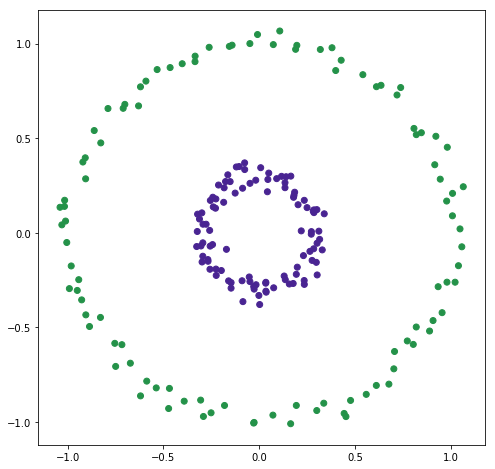

In [7]:
plt.scatter(noisy_circles[:,0], noisy_circles[:,1],c=cmap(c))
plt.show()

In [8]:
mean_models = local_models.local_models.LocalModels(local_models.TLS_models.Mean())
mean_models.fit(noisy_circles)
linear_models = local_models.local_models.LocalModels(local_models.TLS_models.LinearODR_mD(1))
linear_models.fit(noisy_circles)

In [ ]:
BANDWIDTH = 0.1
N_STEPS = 300
ITERATIONS = 300
fig_dir_iterprojections = os.path.join(project_dir, "mean_projections_iteration_b{:.4f}_g{:05d}".format(BANDWIDTH,N_STEPS))
local_models.visualization.make_mean_iterprojections_animation(mean_models, noisy_circles, c, fig_dir_iterprojections, BANDWIDTH, grid_steps=N_STEPS, kernel=KERNEL, iterations=ITERATIONS)

In [ ]:
BANDWIDTH = 0.1
N_STEPS = 300
ITERATIONS = 300
THETA = np.pi/8
theta_generator = iter(lambda: THETA, 111111111111111)
fig_dir_meanline_iterprojections = os.path.join(project_dir, "meanline_projections_iteration_b{:.4f}_g{:05d}_t{:08.04f}".format(BANDWIDTH,N_STEPS,THETA))
local_models.visualization.make_meanline_iterprojections_animation(mean_models, theta_generator, noisy_circles, c, fig_dir_meanline_iterprojections, BANDWIDTH, grid_steps=N_STEPS, kernel=KERNEL, iterations=ITERATIONS)

In [ ]:
BANDWIDTH = 0.1
N_STEPS = 300
ITERATIONS = 300
fig_dir_tlsline_iterprojections = os.path.join(project_dir, "tlsline_projections_iteration_b{:.4f}_g{:05d}".format(BANDWIDTH,N_STEPS))
local_models.visualization.make_tlsline_iterprojections_animation(linear_models, noisy_circles, c, fig_dir_tlsline_iterprojections, BANDWIDTH, grid_steps=N_STEPS, kernel=KERNEL, iterations=ITERATIONS)

In [ ]:
local_models.utils.imgs2video(os.path.join(fig_dir_iterprojections,"*.png"),
           os.path.join(fig_dir_iterprojections,"out.mp4"), 10)

In [ ]:
md(local_models.utils.video_html(os.path.join(fig_dir_iterprojections, "out.mp4"))

In [6]:
bandwidth = 0.2
data = noisy_circles
range_pct = 0.1
kernel = KERNEL
grid_steps = 10

data_mins, data_maxes, data_ranges = local_models.linear_projections.min_max_range(data)
graph_bounds = local_models.linear_projections.sane_graph_bounds(data_mins, data_maxes, data_ranges, range_pct)
spans = np.stack([(-0.02, 0.02, 2j) for i in range(linear_models.model.m)])

grid = local_models.utils.get_global_grid(data, outside_range_pct=range_pct, n_steps=grid_steps)
gridder = local_models.utils.Grid2Vec()
grid = gridder.fit_transform(grid)
projections = grid.copy()
kernel_cb = kernel(bandwidth=bandwidth)

for tls_shifted in local_models.algorithms.local_tls_shift_till_convergence(linear_models, projections, kernel=kernel_cb):
    pass
tls_shifted_Jacobians, tls_shifted_means = local_models.linear_projections.transformate_data(tls_shifted, kernel_cb, linear_models,r=kernel_cb.support_radius())
lines = local_models.linear_projections.make_local_odr_lines(tls_shifted_Jacobians, tls_shifted, spans)





grid_steps = 100

grid = local_models.utils.get_global_grid(data, outside_range_pct=range_pct, n_steps=grid_steps)
gridder = local_models.utils.Grid2Vec()
grid = gridder.fit_transform(grid)
projections = grid.copy()

for tls_shifted2 in local_models.algorithms.local_tls_shift_till_convergence(linear_models, projections, kernel=kernel_cb):
    pass


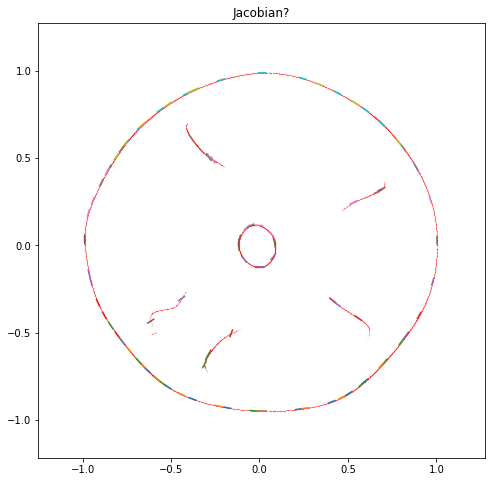

In [7]:
plt.scatter(tls_shifted2[:,0],tls_shifted2[:,1],c='r',s=0.01,marker='.')
local_models.linear_projections.plt_local_odr_lines(lines)
local_models.linear_projections.plt_prettify("Jacobian?", graph_bounds)